In [1]:
import sys
sys.path.append('../src/')

In [2]:
# Third-party libraries:
import numpy as np
# My libraries:
import dataset.dataset as dtset
from dbclass.dbclass import DBCLASS

In [3]:
# Defining the mean and sigma arrays:
mean_array = np.array([[10, 10],
                        [5, 20],
                        [10, 30],
                        [50, 50],
                        [30, 20],
                        [50, 10]])
sigma_array = np.array([[2, 1],
                        [2, 3],
                        [6, 3],
                        [8, 4],
                        [8, 8],
                        [6, 7]])

In [4]:
# Creating the dataset:
ds = dtset.create_dataset(mean_array, sigma_array, n_samples=10000)
ds

{'data': array([[13.52810469, 10.08261103],
        [10.80031442,  9.17846548],
        [11.95747597, 10.0189221 ],
        ...,
        [51.2655363 , 26.75825972],
        [51.05518233, 21.56937527],
        [49.32033231, 24.12712685]]),
 'target': array([0, 0, 0, ..., 5, 5, 5]),
 'target_names': array(['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6'],
       dtype='<U7'),
 'feature_names': array(['x1', 'x2'], dtype='<U2')}

In [5]:
# Using fit and predict:
dbclass = DBCLASS()
dbclass.fit(ds['data'], ds['target'])

In [6]:
# Defining some test points:
test_points = np.array([[10, 10],
                        [5, 20],
                        [10, 30],
                        [50, 50],
                        [30, 20],
                        [50, 10],
                        [0, 0],
                        [6, 12],
                        [13, 15],
                        [4, 26],
                        [21, 30],
                        [40, 16]])


In [7]:
prob_thold_list = [0, 0.2, 0.5, 0.8]
for prob_thold in prob_thold_list:
    print("\nProbability score threshold:", prob_thold)
    y_predictions, y_scores = dbclass.predict(test_points, prob_thold=prob_thold)
    for point, y_predict, score in zip(test_points, y_predictions, y_scores):
        print(point, y_predict, round(score, 6))


Probability score threshold: 0
[10 10] 0 0.999295
[ 5 20] 1 0.999857
[10 30] 2 0.999515
[50 50] 3 0.999825
[30 20] 4 0.998731
[50 10] 5 0.999664
[0 0] 5 0.173262
[ 6 12] 5 0.482493
[13 15] 2 0.433861
[ 4 26] 2 0.512422
[21 30] 2 0.579223
[40 16] 4 0.650155

Probability score threshold: 0.2
[10 10] 0 0.999295
[ 5 20] 1 0.999857
[10 30] 2 0.999515
[50 50] 3 0.999825
[30 20] 4 0.998731
[50 10] 5 0.999664
[0 0] Unknown 0.0
[ 6 12] 5 0.482493
[13 15] 2 0.433861
[ 4 26] 2 0.512422
[21 30] 2 0.579223
[40 16] 4 0.650155

Probability score threshold: 0.5
[10 10] 0 0.999295
[ 5 20] 1 0.999857
[10 30] 2 0.999515
[50 50] 3 0.999825
[30 20] 4 0.998731
[50 10] 5 0.999664
[0 0] Unknown 0.0
[ 6 12] Unknown 0.0
[13 15] Unknown 0.0
[ 4 26] 2 0.512422
[21 30] 2 0.579223
[40 16] 4 0.650155

Probability score threshold: 0.8
[10 10] 0 0.999295
[ 5 20] 1 0.999857
[10 30] 2 0.999515
[50 50] 3 0.999825
[30 20] 4 0.998731
[50 10] 5 0.999664
[0 0] Unknown 0.0
[ 6 12] Unknown 0.0
[13 15] Unknown 0.0
[ 4 26] Unkn

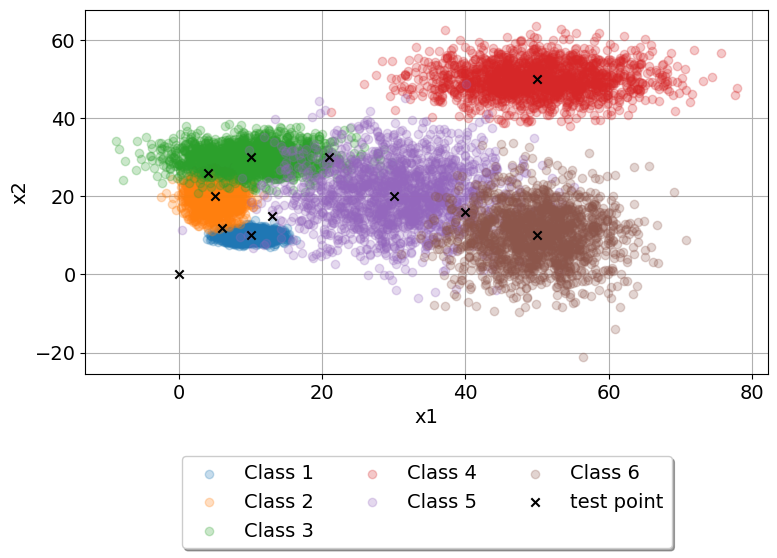

In [8]:
# Plotting the dataset with the test points:
dtset.plot_dataset(ds, feat_index=(0, 1), labeled=True, test_points=test_points)